# Phase 2 - Milestone 1

## 1 - Perkenalan

- Nama : Fadhil Muhammad Irfan
- Batch : FTDS-10
- Link Heroku : https://fadhil-ml1-telco.herokuapp.com/

### Attribute Information

Each row represents a customer, each column contains customer’s attributes.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Objective

- To make a deep learning model for predicting whether a telco customer will Churn

## 2 - Import Libraries

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # splitting train test set
from sklearn.compose import make_column_transformer, ColumnTransformer # column transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder # data normalisation
from sklearn.metrics import classification_report, confusion_matrix # metrics
import tensorflow as tf
from tensorflow import keras
import joblib

## 3 - Data Loading

In [174]:
data = pd.read_csv('https://raw.githubusercontent.com/4dhil/Learning_Journal/main/Phase_1/Week_1/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_copy = data.copy()

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4 - Exploratory Data Analysis

**CEK MISSING VALUES**

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan `.info()`:
- Terdapat 7043 data entries
- Dimana masing-masing kolom tidak memiliki missing values dikarenakan non null count sesuai atau sama dengan total data entries
- Berdasarkan Dtype, kebanyakan datanya merupakan data object
- Dtype yang merupakan kolom numerik adalah `'SeniorCitizen, 'tenure', 'MonthlyCharges'`
- Akan tetapi, jika diperhatikan, kolom `TotalCharges` seharusnya adalah data numerik. Tetapi, terdeteksi sebagai objek. Ada kemungkinan jika terdapat missing values

Cek data dengan tipe string di kolom `TotalCharges`

In [176]:
print('data yang merupakan alphabet di dalam satu cell = ', data['TotalCharges'].str.isalpha().sum())
print('data yang merupakan alphabet dan numerikal didalam satu cell = ', data['TotalCharges'].str.isalnum().sum())
print('data yang merupakan whitespace atau kosong = ', data['TotalCharges'].str.isspace().sum())


data yang merupakan alphabet di dalam satu cell =  0
data yang merupakan alphabet dan numerikal didalam satu cell =  324
data yang merupakan whitespace atau kosong =  11


Berdasarkan `.isalpha()`, `isalnum()`, dan `isspace()`:
- Tidak ada data yang berisi kolom alphabet
- Terdapat 324 data yang memiliki alphabet dan numerik didalam satu cell
- Terdapat 11 data yang diisi kosong

Cek apakah benar dugaan diatas

In [177]:
whitespace_index = data[data['TotalCharges'].apply(lambda x: x.isspace())==True].index
print(data.iloc[whitespace_index,19])

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


Berdasarkan pembuktian diatas index yang tampak oleh gambar diatas menunjukkan bahwa datanya terdapat missing values sehingga diisi kosong.

In [178]:
alphanum_index = data[data['TotalCharges'].apply(lambda x: x.isalnum())==True].index
print(data.iloc[alphanum_index,19])

46        97
62      2962
72      7099
87      1057
93      7107
        ... 
6936     385
6942    1396
6959    3342
7019     826
7020     239
Name: TotalCharges, Length: 324, dtype: object


Berdasarkan pembuktian diatas, ternyata datanya adalah data integer sehingga terdeteksi oleh `isalnum()` sebagai alpha numerical. Sedangkan bila datanya diubah sebagai float dia tidak akan terdeteksi oleh `isalnum()`.

Oleh karena itu data yang terdeteksi kosong akan diubah menjadi np.nan sehingga akan terdeteksi sebagai missing values. 
Untuk data lainnya akan diubah dtypesnya menjadi float.

In [179]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)
print('tipe data = ', data['TotalCharges'].dtype)
print('missing values = ', data.isnull().sum().sum())

tipe data =  float64
missing values =  11


- Tipe data di kolom total charges sudah berubah menjadi float
- Missing values diseluruh dataset ada 11

**CEK DISTRIBUSI DATA NUMERIK**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Berdasarkan `.describe()` kita dapat melihat distribusi datanya:
- kolom `SeniorCitizen` merupakan kolom kategorikal dimana 1 adalah Senior(Lansia) dan 0 adalah Bukan Senior. Maka kolomnya akan dirubah menjadi string
- Jika dilihar dari perbedaan antara kuadran 3 ke kuadran 4, kolom `TotalCharges` perbedaannya paling ekstrim. Ada kemungkinan jika adanya outlier didalam datanya.

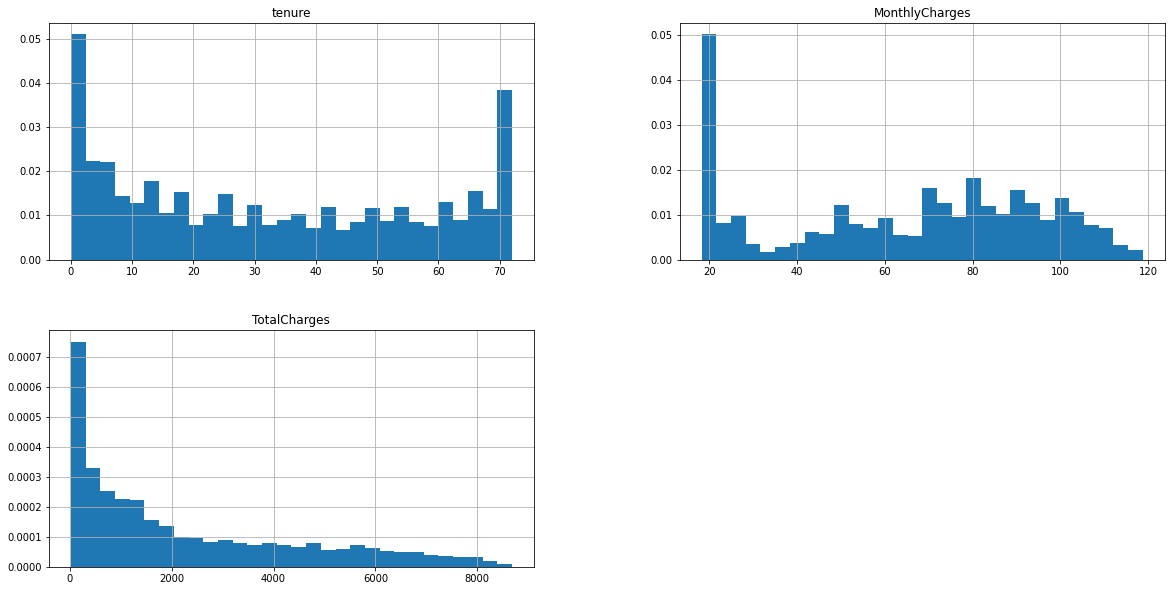

skew value :
 tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
data.drop(['SeniorCitizen'],axis=1).hist(bins=30, figsize=(20,10), density = True)
plt.show()

print('skew value :\n', data.drop(['SeniorCitizen'],axis=1).skew())

Berdasarkan grafik histogram:
- Tenure dan MonthlyCharges terdistribusi normal
- TotalCharges terdistribusi right skewed

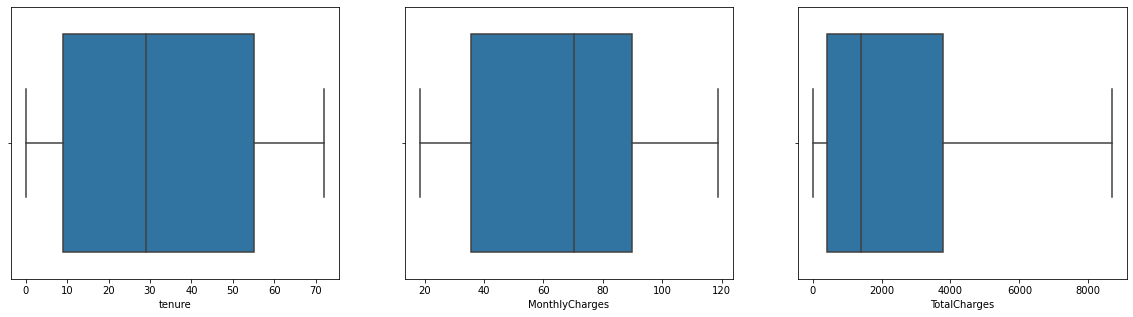

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='tenure')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='MonthlyCharges')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='TotalCharges')

Berdasarkan Boxplot:
- Tidak ada data outlier

**CEK DISTRIBUSI KOLOM KATEGORIK**

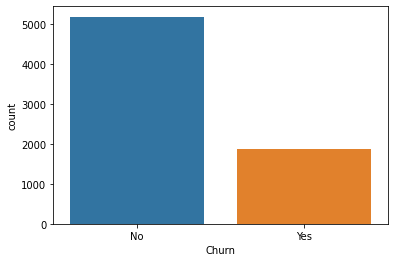

In [ ]:
sns.countplot(data=data, x='Churn')

Berdasarkan barchart diatas, perbandingan data No:Yes adalah 5:2. Sehingga datanya cukup imbalance. Sehingga, kemungkinan besar model akan lebih bisa memprediksi data yang tidak churn

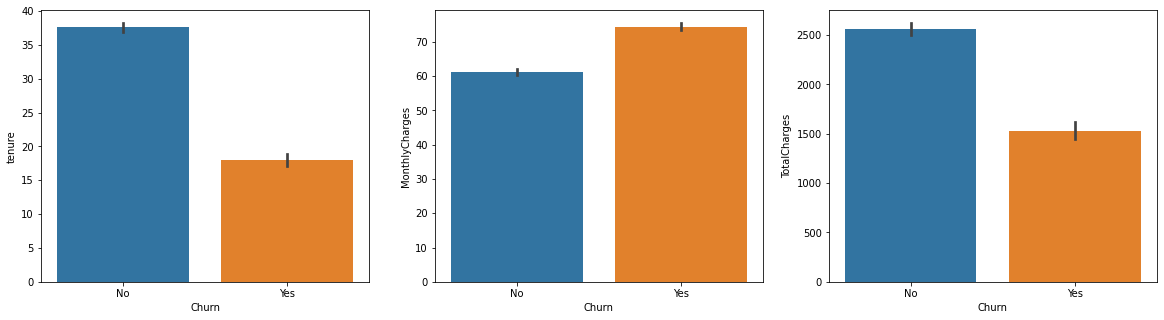

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=data, x='Churn', y='tenure')

plt.subplot(1, 3, 2)
sns.barplot(data=data, x='Churn', y='MonthlyCharges')

plt.subplot(1, 3, 3)
sns.barplot(data=data, x='Churn', y='TotalCharges')

Berdasarkan Barplot diatas mengenai kolom numerik terhadap churn rate adalah:
- Semakin rendah tenure, berarti semakin tinggi kemungkinan seseorang untuk Churn. Hal ini bisa jadi dikarenakan masa pembayaran yang lebih cepat, membuat pengguna lebih sering atau mudah untuk tidak melanjutkan penggunaan jasa
- Semakin tinggi monthly charges, maka kemungkinan churn rate lebih tinggi.
- Semakin tinggi total charges, maka kemungkinan tidak churn lebih tinggi. 

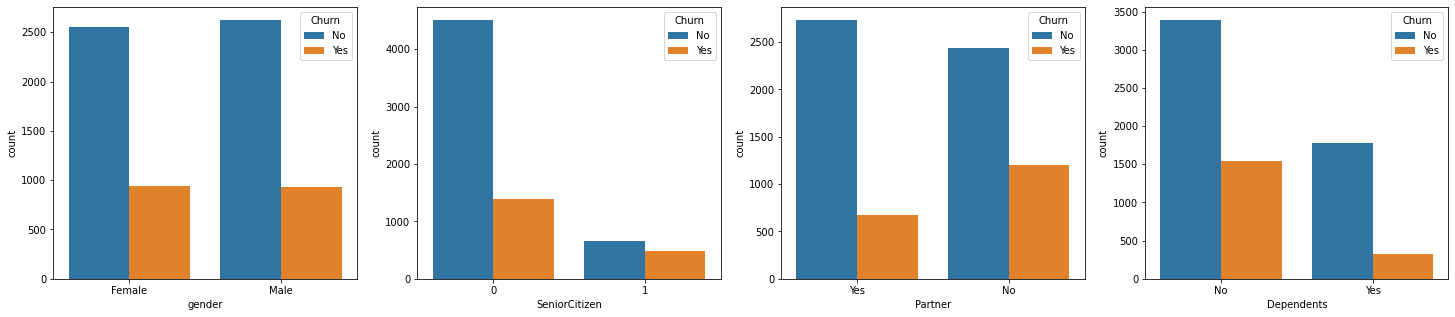

In [180]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.countplot(data=data, x='gender', hue='Churn')

plt.subplot(1, 4, 2)
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')

plt.subplot(1, 4, 3)
sns.countplot(data=data, x='Partner', hue='Churn')

plt.subplot(1, 4, 4)
sns.countplot(data=data, x='Dependents', hue='Churn')

Berdasarkan Countplot diatas mengenai kolom kategorik terhadap churn adalah:
- Gender tidak mempengaruhi churnrate, dikarenakan jumlah churn dan tidak churn antara female dan male adalah sama.
- Jika seseorang merupakan Senior citizen, maka kemungkinan churn lebih tinggi
- Jika seseorang tidak memiliki partner selama penggunaan jasa, maka kemungkinan churn lebih tinggi
- Jika seseorang adalah dependents (mempunyai tanggungan atau keluarga), maka churn rate lebih rendah

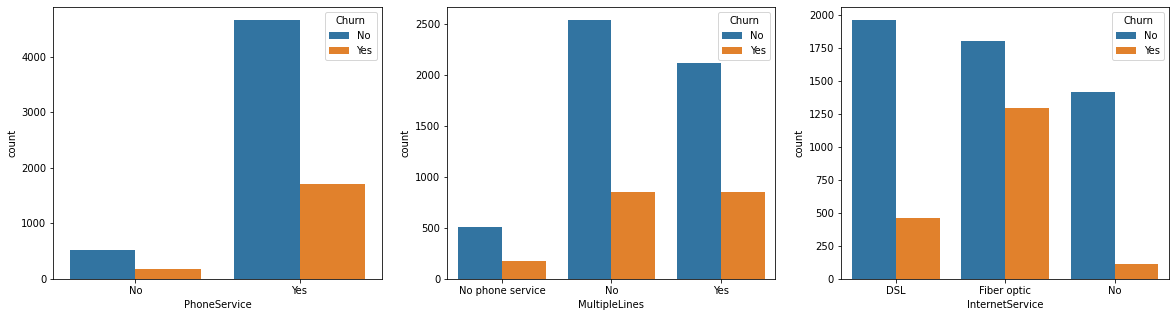

In [187]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhoneService', hue='Churn')

plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MultipleLines', hue='Churn')

plt.subplot(1, 3, 3)
sns.countplot(data=data, x='InternetService', hue='Churn')



Berdasarkan Countplot diatas mengenai kolom kategorik terhadap churn adalah:
- Churnrate tidak terlalu terpengaruhi oleh PhoneService
- Churnrate tidak terlalu terpengaruhi oleh MultipleLines
- Jika seseorang menggunakan fiber optic, maka kemungkinan churn lebih tinggi


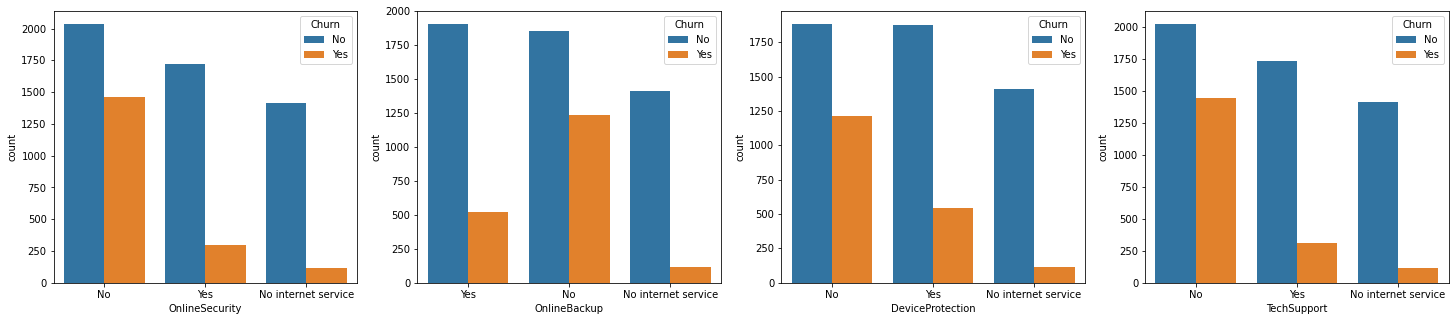

In [185]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.countplot(data=data, x='OnlineSecurity', hue='Churn')

plt.subplot(1, 4, 2)
sns.countplot(data=data, x='OnlineBackup', hue='Churn')

plt.subplot(1, 4, 3)
sns.countplot(data=data, x='DeviceProtection', hue='Churn')

plt.subplot(1, 4, 4)
sns.countplot(data=data, x='TechSupport', hue='Churn')

Berdasarkan Countplot diatas mengenai kolom kategorik terhadap churn adalah:
- Jika seseorang tidak memiliki OnlineSecurity maka kemungkinan churn lebih tinggi
- Jika seseorang tidak memiliki OnlineBackup, maka churn rate lebih tinggi
- Jika seseorang tidak memiliki device protection, maka churn rate lebih tinggi
- Jika seseorang tidak memiliki tech support, maka churn rate lebih tinggi
- Bisa disimpulkan dari keempat grafik diatas jika seseorang tidak memiliki pengamanan, maka kemungkinan churn lebih tinggi

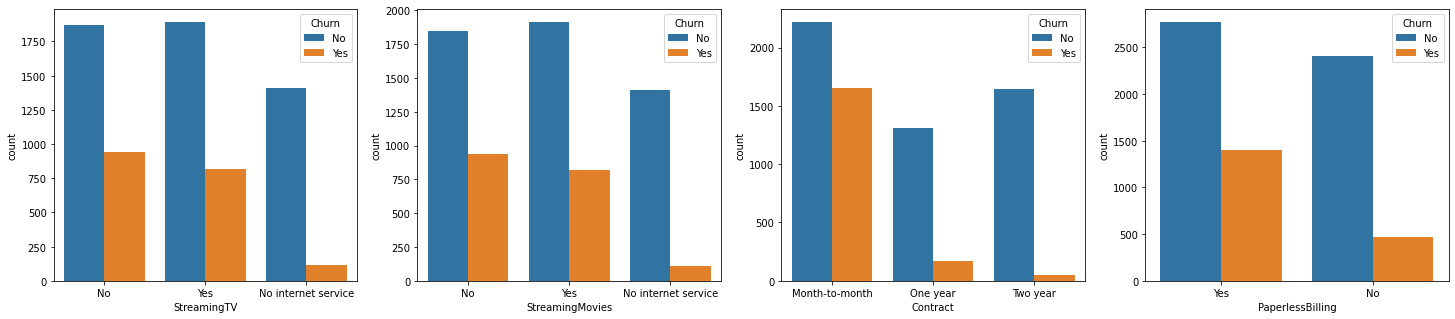

In [186]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.countplot(data=data, x='StreamingTV', hue='Churn')

plt.subplot(1, 4, 2)
sns.countplot(data=data, x='StreamingMovies', hue='Churn')

plt.subplot(1, 4, 3)
sns.countplot(data=data, x='Contract', hue='Churn')

plt.subplot(1, 4, 4)
sns.countplot(data=data, x='PaperlessBilling', hue='Churn')

Berdasarkan Countplot diatas mengenai kolom kategorik terhadap churn adalah:
- StreamingTV atau movies tidak memilki pengaruh terhadap churn rate
- Tipe kontrak atau pembayaran perbulan, memilki churn rate yang tinggi bisa dikarenakan client lebih mudah untuk mengcancel subscription
- Jika seseorang menggunakan paperless billing, maka churnrate lebih tinggi hal ini kemungkinan dikarenakan pengguna lebih jarang menggunakan atau membaca email mereka|

## 5 - Data Preprocessing

Mengubah kolom `SeniorCitizen` menjadi kategorikal dan encoding kolom target

In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:"no", 1:"yes"})
data['Churn'] = data['Churn'].map({"No":0, "Yes":1})

Split Data Inference

In [ ]:
data_inf = data.sample(10, random_state=10)
data_train_test = data.drop(data_inf.index)
data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop = True, inplace=True)
data_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,no,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0
1,8183-ONMXC,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
2,0575-CUQOV,Male,yes,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0
3,8627-ZYGSZ,Male,no,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0
4,4918-FYJNT,Female,yes,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0


### Split Data Train, Validation, and Test

In [ ]:
X = data_train_test.drop(['Churn'],axis=1)
y = data_train_test['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=46)

### Handling Missing Values

Mengisi missing values dengan median

In [ ]:
med = data['TotalCharges'].median()
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(med)
X_val['TotalCharges'] = X_val['TotalCharges'].fillna(med)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(med)

### Feature Selection

Drop features customerID dikarenakan valuenya unik untuk setiap sample, sehingga dia tidak memiliki keterkaitan terhadap target

In [ ]:
X_train.drop(['customerID'], axis=1, inplace=True)
X_val.drop(['customerID'], axis=1, inplace=True)
X_test.drop(['customerID'], axis=1, inplace=True)

Cek korelasi pada kolom numerikal dengan pearson correlation

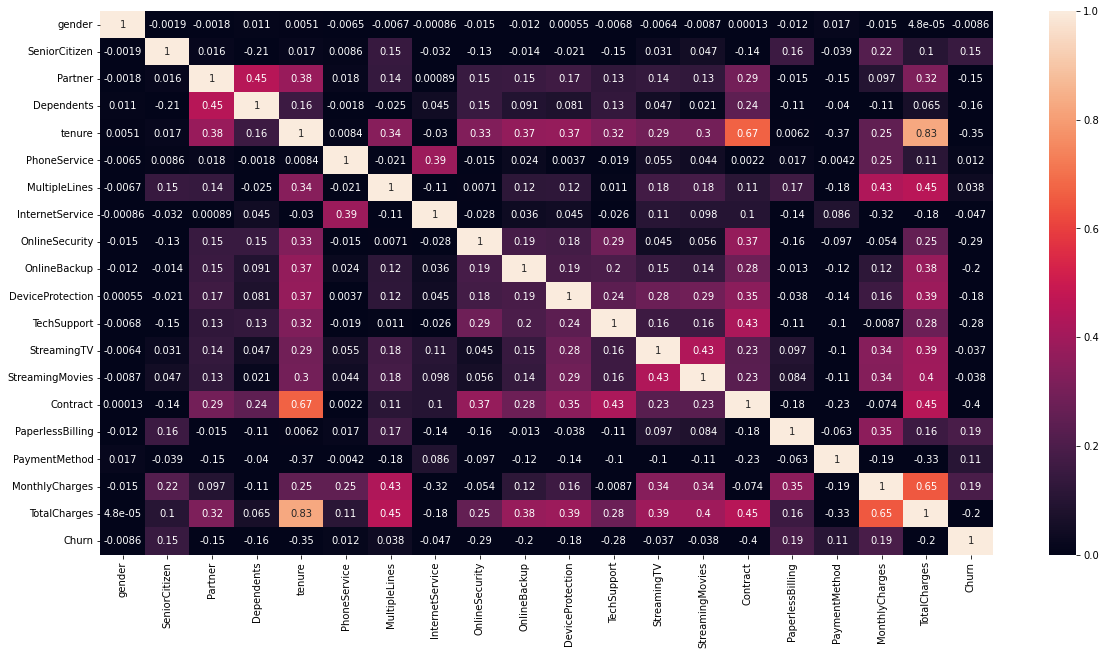

In [ ]:
data_corr = data.drop(['customerID'],axis=1)
encoder = LabelEncoder() 

for i in data_corr:
    if data_corr[i].dtypes == 'object':
        data_corr[i] = encoder.fit_transform(data_corr[i])

corr = data_corr.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Mengambil kolom yang mempunyai korelasi diatas 0.1

In [ ]:
cor_target = abs(corr["Churn"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(relevant_features)
print(relevant_features.keys())

SeniorCitizen       0.150889
Partner             0.150448
Dependents          0.164221
tenure              0.352229
OnlineSecurity      0.289309
OnlineBackup        0.195525
DeviceProtection    0.178134
TechSupport         0.282492
Contract            0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.199484
Churn               1.000000
Name: Churn, dtype: float64
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


Mengurangi jumlah kolom sesuai dengan fitur terpilih didalan train, val, dan test set

In [ ]:
features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

X_train_selected = X_train[features]
X_val_selected = X_val[features]
X_test_selected = X_test[features]

### Data Normalisation

Pisahkan kolom numerikal dan kategorikal

In [ ]:
num_columns = X_train_selected.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_selected.select_dtypes(include=['object']).columns.tolist()

print('Numerical col: ', num_columns)
print('Categorical col: ', cat_columns)

Numerical col:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical col:  ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


normalisasi data:
- Numerikal dengan `StandardScaler()`
- Categorikal dengan `OneHotEncoder()`

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [ ]:
transformer = ColumnTransformer([
    ('scaler', scaler, num_columns),
    ('ohe', ohe, cat_columns)
])

In [ ]:
X_train_trans = transformer.fit_transform(X_train_selected)
X_val_trans = transformer.transform(X_val_selected)
X_test_trans = transformer.transform(X_test_selected)

**SAVE DATA PREPROCESSING**

In [ ]:
joblib.dump(transformer, "transformer.pkl")

['transformer.pkl']

### Pipeline dengan TensorFlow

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_trans, y_train)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_trans, y_val)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_trans, y_test)).batch(64)

## 6 - Model Definition 

In [ ]:
X_train_trans.shape

(3938, 30)

**Sequential API**

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(20, input_shape=(30,), activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                620       
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


**Functional API**

In [ ]:
data_in = keras.layers.Input(shape=(30,))

hidden_1 = keras.layers.Dense(20, activation='relu')(data_in)
drop_1 = keras.layers.Dropout(0.5)(hidden_1)

hidden_2 = keras.layers.Dense(10, activation='relu')(drop_1)
drop_2 = keras.layers.Dropout(0.5)(hidden_2)

out = keras.layers.Dense(1, activation='sigmoid')(drop_2)

model1 = keras.models.Model(inputs=data_in, outputs=out)
model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_15 (Dense)            (None, 20)                620       
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable param

## 7 - Model Training

In [ ]:
# Sequential API
history = model.fit(train_dataset, epochs=200, validation_data=(val_dataset))

Epoch 1/200
62/62 [==============================] - 1s 5ms/step - loss: 0.8444 - accuracy: 0.4865 - val_loss: 0.6173 - val_accuracy: 0.7014
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6366 - val_loss: 0.5508 - val_accuracy: 0.7435
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.6938 - val_loss: 0.5012 - val_accuracy: 0.7435
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7153 - val_loss: 0.4760 - val_accuracy: 0.7435
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.7270 - val_loss: 0.4621 - val_accuracy: 0.7435
Epoch 6/200
62/62 [==============================] - 0s 5ms/step - loss: 0.5257 - accuracy: 0.7390 - val_loss: 0.4570 - val_accuracy: 0.7453
Epoch 7/200
62/62 [==============================] - 0s 7ms/step - loss: 0.5121 - accuracy: 0.7379 - val_loss: 0.4515 - val_accuracy: 0.7453
Epoch 8/200
6

In [ ]:
# functional API
history1 = model1.fit(train_dataset, epochs=200, validation_data=(val_dataset))

Epoch 1/200
62/62 [==============================] - 1s 5ms/step - loss: 0.6090 - accuracy: 0.6917 - val_loss: 0.5123 - val_accuracy: 0.7678
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7263 - val_loss: 0.4801 - val_accuracy: 0.7790
Epoch 3/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7329 - val_loss: 0.4654 - val_accuracy: 0.7796
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7357 - val_loss: 0.4550 - val_accuracy: 0.7826
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7412 - val_loss: 0.4523 - val_accuracy: 0.7873
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7544 - val_loss: 0.4461 - val_accuracy: 0.7879
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7580 - val_loss: 0.4418 - val_accuracy: 0.7932
Epoch 8/200
6

## 8 - Model Evaluation

Sequential API

Text(0.5, 1.0, 'Dengan Dropout')

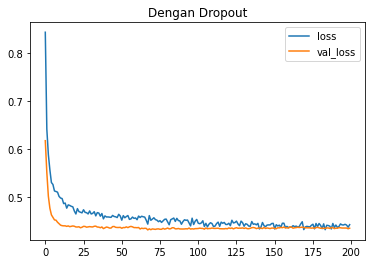

In [ ]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

Berdasarkan grafik diatas:
- Nilai loss ada dibawah 0.5
- Setelah epoch ke 150 nilai loss dan val loss mulai mendekati satu sama lain sehingga model tidak overfit

In [ ]:
y_pred = model.predict(X_test_trans)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.44      0.53       372

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Berdasarkan Classification Report:
- Nilai akurasi dari model adalah 0.79
- Model cenderung dapat menebak customer yang tidak churn (0) dikarenakan sample yang dimiliki lebih banyak untuk customer tidak churn
- Hasil recall rendah (dibawah 50% atau 44%) menunjukkan bahwa hasil False Negative tinggi yang artinya banyak customer churn yang tidak terdeteksi
- Hasil precision tinggi (diatas 60% atau 66%) menunjukkan jika False Positive rendah yang artinya customer yang seharusnya tidak churn tapi dideteksi churn jumlahnya sedikit.

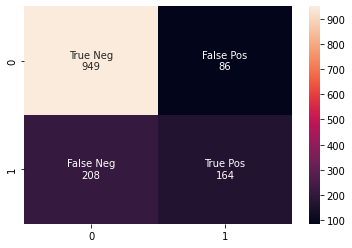

In [190]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_count = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_count)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='')

Berdasarkan confusion matrix:
- Confusion matrix membuktikan pernyataan sebelumnya dimana:
  - False Negative tinggi yang artinya banyak orang churn tapi tidak terdeteksi
  - Flase Positive rendah yang artinya orang tidak churn tapi terdeteksi churn jumlah nya sedikit

Functional API

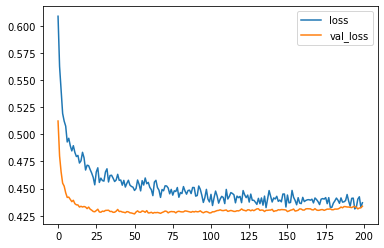

In [ ]:
metrics1 = pd.DataFrame(history1.history)
metrics1[['loss', 'val_loss']].plot();

Berdasarkan grafik diatas:
- Nilai loss ada dibawah 0.45
- Pada epoch ke 200 nilai loss dan val loss mendekati satu sama lain sehingga model tidak overfit

In [ ]:
y_pred1 = model1.predict(X_test_trans)
y_pred1 = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.44      0.53       372

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Berdasarkan Classification Report:
- Nilai akurasi dari model adalah 0.79
- Model cenderung dapat menebak customer yang tidak churn (0) dikarenakan sample yang dimiliki lebih banyak untuk customer tidak churn
- Hasil recall rendah (dibawah 50% atau 44%) menunjukkan bahwa hasil False Negative tinggi yang artinya banyak customer churn yang tidak terdeteksi
- Hasil precision tinggi (diatas 60% atau 66%) menunjukkan jika False Positive rendah yang artinya customer yang seharusnya tidak churn tapi dideteksi churn jumlahnya sedikit.

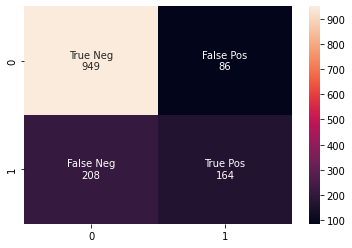

In [192]:
cf_matrix = confusion_matrix(y_test, y_pred1)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_count = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_count)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='')

Berdasarkan confusion matrix:
- COnfusion matrix membuktikan pernyataan sebelumnya dimana:
  - False Negative tinggi yang artinya banyak orang churn tapi tidak terdeteksi
  - Flase Positive rendah yang artinya orang tidak churn tapi terdeteksi churn jumlah nya sedikit

### Summary
- Tidak ada perbedaan yang signifikan dari grafik loss dan val loss antara Sequential API dan Functional API
- Grafik loss dan val loss menunjukkan jika saat epoch ke 200 kedua model tidaklah overfit
- Jika dilihat dari Classification report, nilai dari tiap metriksnya di kedua API sama
- Akurasi dikedua model adalah 79%
- Model lebih cenderung memprediksi customer tidak churn dikarenakan datanya imbalance
- Dari nilai Recall dan False Negative dapat dikatakan bila model ini tidak dapat memprediksi churn rate
- Berdasarkan keseluruhan hasil metriks, bisa dikatakan bila penulisan API (sequential atau functional) tidak mempengaruhi hasil atau hasil yang didapatkan adalah sama antar satu sama lain
- Model yang akan disave adalah model sequential tetapi tidak ada alasan tertentu untuk masalah penggunaannya

In [ ]:
model.save("modelque.h5")

## 9 - Model Inference

In [ ]:
model_inf = keras.models.load_model("modelque.h5")
transformer = joblib.load("transformer.pkl")

In [ ]:
data_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2486-WYVVE,Male,no,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0
1,8183-ONMXC,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.75,159.45,1
2,0575-CUQOV,Male,yes,Yes,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.95,5867.00,0
3,8627-ZYGSZ,Male,no,Yes,No,47,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Electronic check,78.90,3650.35,0
4,4918-FYJNT,Female,yes,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.80,0


In [ ]:
y = data_inf['Churn']

In [ ]:
data_inf_selected = data_inf[features]

data_inf_selected.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,no,Yes,No,31,No,No,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00
1,no,No,No,2,No,No,No,No,Month-to-month,No,Electronic check,80.75,159.45
2,yes,Yes,No,60,No,Yes,Yes,No,One year,Yes,Electronic check,97.95,5867.00
3,no,Yes,No,47,No,Yes,No,No,One year,Yes,Electronic check,78.90,3650.35
4,yes,Yes,No,55,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,90.45,5044.80


In [ ]:
inf_scaled = transformer.transform(data_inf_selected)
y_inf = model_inf.predict(inf_scaled)
y_inf = np.where(y_inf > 0.5, 1, 0)


In [ ]:
result = y_inf.flatten()

In [ ]:
pred = {'Churn pred': result}
pred = pd.DataFrame(data=pred)
concat = pd.concat([data_inf_selected, y, pred],axis=1)
concat

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn pred
0,no,Yes,No,31,No,No,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00,0,0
1,no,No,No,2,No,No,No,No,Month-to-month,No,Electronic check,80.75,159.45,1,1
2,yes,Yes,No,60,No,Yes,Yes,No,One year,Yes,Electronic check,97.95,5867.00,0,0
3,no,Yes,No,47,No,Yes,No,No,One year,Yes,Electronic check,78.90,3650.35,0,0
4,yes,Yes,No,55,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,90.45,5044.80,0,0
5,yes,No,No,22,Yes,Yes,No,No,Month-to-month,No,Electronic check,81.70,1820.90,0,0
6,no,Yes,Yes,16,No,No,No,No,Month-to-month,Yes,Credit card (automatic),35.50,552.70,0,0
7,no,Yes,No,62,Yes,Yes,No,Yes,Two year,Yes,Electronic check,84.95,5150.55,0,0
8,no,Yes,Yes,18,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,357.00,0,0
9,yes,No,No,57,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),101.30,5779.60,0,0


Berdasarkan model inference, data inference dapat diprediksi menggunakan model yang telah dibuat. Dimana, dari 10 model semuanya terdeteksi dengan benar

## 10 - Kesimpulan

- Terdapat 11 missing values di kolom TotalCharges, sehingga diimputasi dengan median
- Tidak ada outliers didalam dataset
- Datanya Imbalace dengan perbandingan No:Yes yaitu 5:2
- Analisa hasil EDA:
  - Kolom yang tidak memiliki pengaruh terhadap target adalah kategorik:
 `['StreamingTV', 'StreamingMovies', 'Gender', 'PhoneService', 'MultipleLines']`
  - Semua kolom numerik menunjukkan ada keterkaitan terhadap target
  - Selain kolom Kategorik yang disebutkan sebelumnya, semuanya memiliki kaitan terhadap target
  - jika seseorang tidak memiliki pengamanan seperti `'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport'` maka kemungkinan churn lebih tinggi

- Menggunakan pearson correlation, dimana korelasi diatas 0.1 terhadap target adalah feature yang terpilih, yaitu: 

`['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']`
- Pada ANN, struktur-nya adalah:
  - 2 hidden layer yang terdiri dari 20 dan 10 layer yang dimana activation function yang digunakan adalah relu dan dropout(0.5)
  - Optimizer yang digunakan adalah adam
- Pada Model Evaluation:
  - Tidak ada perbedaan yang signifikan antara Sequential API dan Functional API
  - Grafik loss dan val loss menunjukkan jika saat epoch ke 200 kedua model tidaklah overfit, dimana akurasinya adalah 79%
  - Model lebih cenderung memprediksi customer tidak churn dikarenakan datanya imbalance
  - Dari nilai Recall dan False Negative yang tidak baik, dapat dikatakan bila model ini tidak dapat memprediksi churn rate